#  The Titanic Dataset Project

## Importing pandas and Loading the data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

titanic = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## DATA PREPROCESSING

## Handling missing values in Age and Embarked and we will drop the Cabin because it has lot of missing values

### In this missing values, for the Age, we fill null values with the median age of the ages.
### and for the Embarked, we fill it by changing the value using the mode and represent it with 0

In [3]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

titanic = titanic.drop('Cabin', axis=1)

## Encode Categorical Variables

### We are going convert the Sex column into numerical values; Male = 0 and Female = 1 
### and also use one-hot encoding for the Embarked

In [4]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

### Now we drop other columns which are also irrelevant columns

In [5]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

### Now lets have a look at the the dataset now.

In [6]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [7]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [8]:
titanic.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_Q       bool
Embarked_S       bool
dtype: object

In [9]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


## Exploratory Data Analysis (EDA)

### Visualize Survival Rates

### Now we plot survival rates by socio-economic status; Pclass, age, survival and sex using seaborn and matplotlib libraries

<Axes: xlabel='Age', ylabel='Count'>

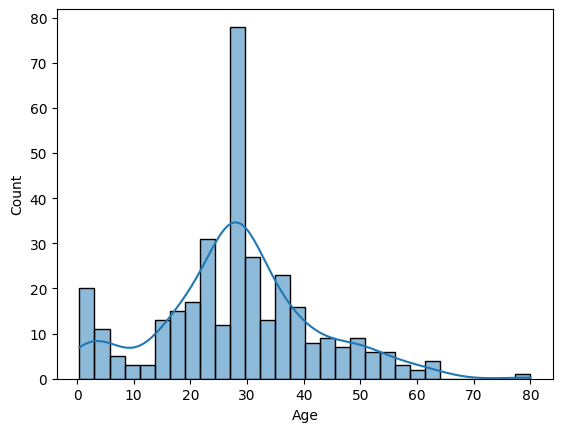

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(titanic[titanic['Survived'] ==1]['Age'], kde=True, bins=30)

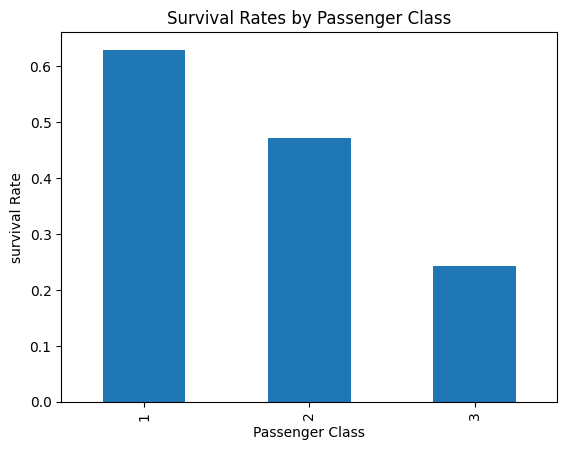

In [12]:
class_survival = titanic.groupby('Pclass')['Survived'].mean()
class_survival.plot(kind='bar')
plt.title("Survival Rates by Passenger Class")
plt.ylabel("survival Rate")
plt.xlabel("Passenger Class")
plt.show()

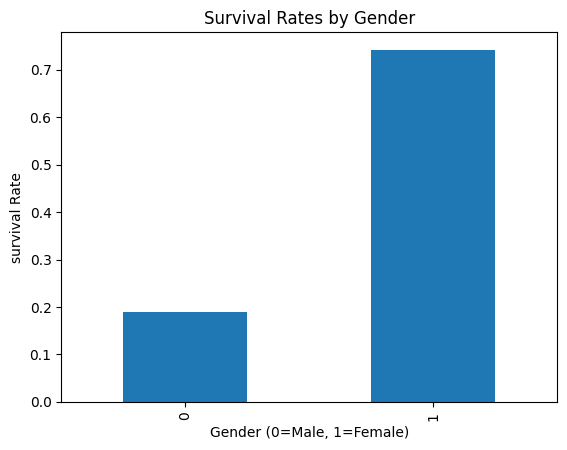

In [13]:
Sex_survival = titanic.groupby('Sex')['Survived'].mean()
Sex_survival.plot(kind='bar')
plt.title("Survival Rates by Gender")
plt.ylabel("survival Rate")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.show()

### Analyzing the Correlation 

### Using the heatmap to see which factors are strongly related to the survival

<Axes: >

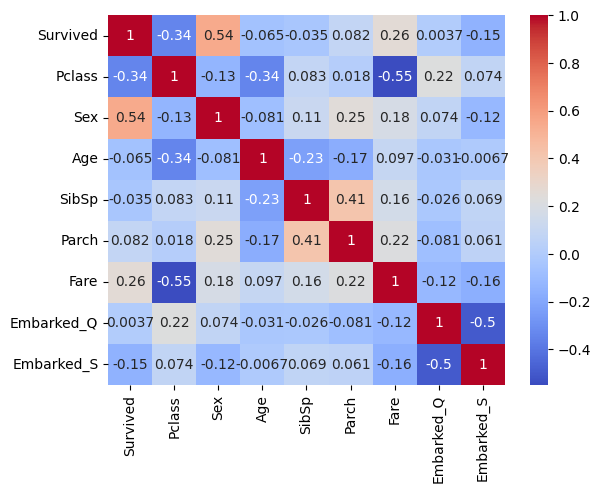

In [14]:
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')

## Feature Engineering

### Here we to create a new feature by putting members of each family together. This to know the number of families who where in the Titanic Ship

### Family size = SibSp + Parch + 1
### SibSp means the Siblings/Spouses in the ship
### Parch means Parents/Childern in the ship
### +1 for the passenger themselves

In [15]:
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1

titanic.Family_Size

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family_Size, Length: 891, dtype: int64

### if the passenger is alone in the ship

In [16]:
titanic['Is_Alone'] = (titanic['Family_Size'] == 1).astype(int)

titanic.Is_Alone

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: Is_Alone, Length: 891, dtype: int64

### Bar chart to see the survival rate per family size

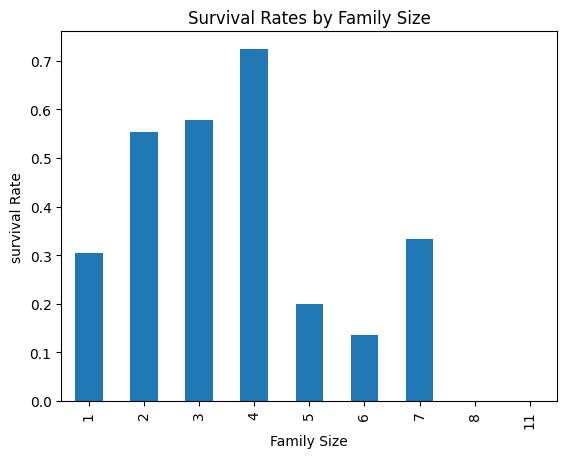

In [17]:
Family_survival = titanic.groupby('Family_Size')['Survived'].mean()
Family_survival.plot(kind='bar')
plt.title("Survival Rates by Family Size")
plt.ylabel("survival Rate")
plt.xlabel("Family Size")
plt.show()

### New look of the dataset

In [18]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Family_Size,Is_Alone
0,0,3,0,22.0,1,0,7.2500,False,True,2,0
1,1,1,1,38.0,1,0,71.2833,False,False,2,0
2,1,3,1,26.0,0,0,7.9250,False,True,1,1
3,1,1,1,35.0,1,0,53.1000,False,True,2,0
4,0,3,0,35.0,0,0,8.0500,False,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,True,1,1
887,1,1,1,19.0,0,0,30.0000,False,True,1,1
888,0,3,1,28.0,1,2,23.4500,False,True,4,0
889,1,1,0,26.0,0,0,30.0000,False,False,1,1


## MODELING

### Here we are going to split the data into training and testing sets

In [19]:
from sklearn.model_selection import train_test_split
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Now we train models on Logistic Regression and Random Forest

### Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)
RF_predictions = RF_model.predict(X_test)

accuracy = accuracy_score(y_test, RF_predictions)
print("Classification Report:")
print(classification_report(y_test, RF_predictions))
print(f"Accuracy: {accuracy * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 83.24%


### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=300)
LR_model.fit(X_train, y_train)
LR_predictions = LR_model.predict(X_test)
accuracy = accuracy_score(y_test, LR_predictions)

print("Classification Report:") 
print(classification_report(y_test, LR_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, LR_predictions))

print(f"Accuracy: {accuracy * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[89 16]
 [20 54]]
Accuracy: 79.89%


## Feature Importance Analysis

### This shows which features contribute most to survival predictions

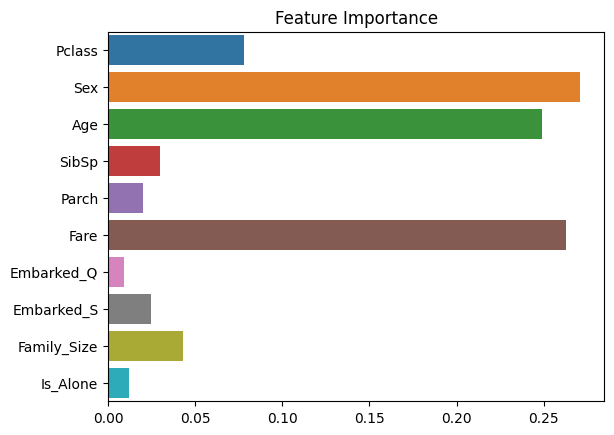

In [22]:
importances = RF_model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")
plt.show()